# 12.2 Centering Predictors

A “meaningful zero” in a predictor variable means that the zero point of this variable has a substantive interpretation, in contrast to e.g. an age of 0 if your sample only contains adults. 
In polynomial regression, a meaningful zero is especially useful as it improves the interpretation of lower-order coefficients. 

Centering thus:

- Simplifies the interpretation: When you center the predictor, the interpretation of lower-order terms becomes simpler. For example, in a centered quadratic model, the linear coefficient now tells you the rate of change at the mean of the predictor, rather than at zero, which might not be a meaningful or sensible point.

## Example

Consider a simple quadratic regression model: 

$$\hat{y} = \beta_0 + \beta_1 \cdot x + \beta_2 \cdot x^2$$

Without centering, $\beta_1$ is interpreted as the rate of change of $y$ with respect to $x$ when $x$ is zero. If zero is not meaningful (e.g., if $x$ is the age in a sample of only adults), this interpretation doesn’t make much practical sense. With centering, $\beta_1$ is interpreted as the rate of change of $y$ with respect to $x$ when $x$ is at its mean, which can be helpful.

We can center `study_time` by simply substracting its mean:

```{admonition} Note:
:class: note

In our example, we have a meaningful 0, since 𝑥 = 0 represents 0 hours of study per day, so centering would not be strictly necessary. However, one could argue that we could improve on it, since very few students study exactly 0 hours. After centering, the linear coefficient tells us the slope of exam performance at **mean study time**. 

```

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     744.2
Date:                Wed, 09 Apr 2025   Prob (F-statistic):          3.42e-150
Time:                        08:53:27   Log-Likelihood:                -1771.2
No. Observations:                 500   AIC:                             3548.
Df Residuals:                     497   BIC:                             3561.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         78.6538      0.563    139.821      0.0

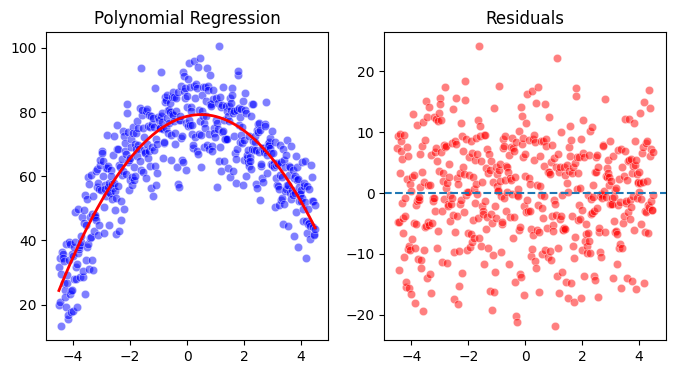

In [1]:
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from matplotlib import pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

# Simulate the data
np.random.seed(69)
study_time = np.linspace(1, 10, 500)
h = 6
k = 80
grades = -(k / (h**2)) * (study_time - h)**2 + k + np.random.normal(0, 8, study_time.shape)

# Center study_time
study_time_centered = study_time - np.mean(study_time)

# Create polynomial features
poly_features = PolynomialFeatures(degree=2, include_bias=True)
study_time_centered_features = poly_features.fit_transform(study_time_centered.reshape(-1, 1))

# Fit the model
model_fit = sm.OLS(grades, study_time_centered_features).fit()
predictions = model_fit.predict(study_time_centered_features)
residuals = model_fit.resid

# Plot the residuals
fig, ax = plt.subplots(1, 2, figsize=(8,4))

sns.scatterplot(x=study_time_centered, y=grades, color='blue', alpha=0.5, ax=ax[0])
ax[0].plot(study_time_centered, predictions, color='red', linewidth=2)
ax[0].set_title('Polynomial Regression')

sns.scatterplot(x=study_time_centered, y=residuals, color='red', alpha=0.5, ax=ax[1])
ax[1].axhline(0, linestyle='--')
ax[1].set_title('Residuals');

# Print summary
print(model_fit.summary())

## Interpretation

- The expected `grade` for an average `study_time` is 78.65 (in a scale between 0 and 100).
- The linear regression of Y on X at the mean of X (which is now 0) is 2.17. The positive coefficient tells us that at the mean of `study_time`, `grade` is still increasing. This value also indicates the average linear slope of the regression of Y on X in the quadratic equation.
- The negative quadratic coefficient tells us that the function has an inverted-U shape.
- The variance explained by the model stays the same.